In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 이미지 분류 연습 - 머신러닝(KNN)

K-NN 알고리즘을 사용하여 이미지 분류하기

K-NN 알고리즘은 무엇인가?

거리 기반 알고리즘

In [3]:
# https://github.com/poojasrini/Image-classification-using-KNN/blob/main/Image_Classification.ipynb

In [9]:
# cd /content/drive/MyDrive/project3/data/practice_image

/content/drive/.shortcut-targets-by-id/1gdU-KuXDUU7v2o8X7TdV0JgGiz603mCc/project3/data/practice_image


In [ ]:
# !pip install bing-image-downloader
# import bing_image_downloader

# from bing_image_downloader import downloader
# downloader.download('rose flower', limit=50,  output_dir='images', adult_filter_off=True, force_replace=False, timeout=60)
# downloader.download('sunflower flower', limit=50,  output_dir='images', adult_filter_off=True, force_replace=False, timeout=60)
# downloader.download('marigold flower', limit=50,  output_dir='images', adult_filter_off=True, force_replace=False, timeout=60)
# downloader.download('daisy flower', limit=50,  output_dir='images', adult_filter_off=True, force_replace=False, timeout=60)

In [14]:
import numpy as np
from skimage.transform import resize
from skimage.io import imread
import matplotlib.pyplot as plt
import os


In [22]:
target = []
images = []   # In matrix format
flat_data = []  # In vector format

datadir = '/content/drive/MyDrive/project3/data/practice_image/flower_images'
categories = ['rose flower','sunflower flower','marigold flower','daisy flower']

for category in categories:
  class_index=categories.index(category)
  path=os.path.join(datadir,category)
  for img in os.listdir(path):
    img_matrix=imread(os.path.join(path,img))
    img_resized=resize(img_matrix,(150,150,3))
    flat_data.append(img_resized.flatten())
    images.append(img_resized)
    target.append(category)

In [23]:
import pandas as pd
df=pd.DataFrame(flat_data)
df['Target']=target

In [24]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,67491,67492,67493,67494,67495,67496,67497,67498,67499,Target
0,0.447174,0.446651,0.353917,0.443722,0.441398,0.350161,0.429601,0.422960,0.338748,0.409802,...,0.312059,0.317196,0.285140,0.337483,0.340736,0.311308,0.365064,0.358590,0.328391,rose flower
1,0.499949,0.524832,0.342731,0.420880,0.388275,0.284118,0.520411,0.442530,0.314369,0.658038,...,0.216665,0.175808,0.290618,0.210358,0.171453,0.289344,0.215851,0.192654,0.282758,rose flower
2,0.064944,0.068427,0.046171,0.068477,0.072404,0.045385,0.072389,0.076407,0.050190,0.072393,...,0.041900,0.063751,0.028480,0.046931,0.073427,0.029963,0.057597,0.088121,0.044802,rose flower
3,0.096903,0.139727,0.013094,0.091323,0.134695,0.013265,0.085049,0.129281,0.010565,0.083012,...,0.170683,0.153525,0.048848,0.175337,0.154815,0.052904,0.179384,0.156609,0.055707,rose flower
4,0.152878,0.478292,0.030516,0.158235,0.493213,0.052762,0.150482,0.471057,0.049562,0.103878,...,0.010943,0.263514,0.008219,0.017724,0.320483,0.006248,0.073349,0.403220,0.011527,rose flower


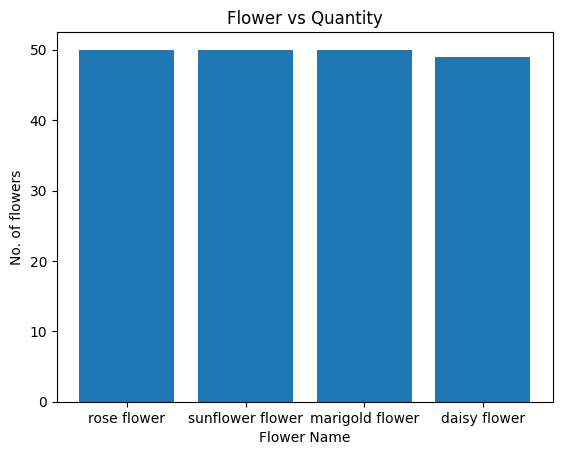

In [25]:
# Display of the number of images of each flower type
plt.bar(categories,df['Target'].value_counts())
plt.title('Flower vs Quantity')
plt.xlabel('Flower Name')
plt.ylabel('No. of flowers')
plt.show()


In [26]:
# Input and Output
x=df.iloc[:,0:67500].values
y=df.iloc[:,67500].values

3) Classification of images using KNN Classification Algorithm

In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
k=np.arange(1,160)
param={'n_neighbors':k}
model=KNeighborsClassifier()
model_grid=GridSearchCV(model,param)
model_grid.fit(x,y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159])})

In [28]:
# Best K nearest neighbor
model_grid.best_params_

{'n_neighbors': 4}

In [29]:

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0)

In [30]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [32]:
model = KNeighborsClassifier(n_neighbors=4, metric='euclidean')
model.fit(x_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=4)

In [33]:
# Predicted output
y_pred = model.predict(x_test)
y_pred

array(['rose flower', 'daisy flower', 'marigold flower',
       'sunflower flower', 'daisy flower', 'daisy flower',
       'marigold flower', 'marigold flower', 'rose flower', 'rose flower',
       'marigold flower', 'sunflower flower', 'daisy flower',
       'rose flower', 'marigold flower', 'rose flower', 'marigold flower',
       'marigold flower', 'rose flower', 'rose flower', 'daisy flower',
       'sunflower flower', 'rose flower', 'daisy flower',
       'sunflower flower', 'rose flower', 'rose flower', 'rose flower',
       'marigold flower', 'rose flower', 'rose flower', 'marigold flower',
       'sunflower flower', 'marigold flower', 'rose flower',
       'daisy flower', 'marigold flower', 'rose flower',
       'marigold flower', 'daisy flower', 'daisy flower',
       'sunflower flower', 'rose flower', 'rose flower', 'rose flower',
       'sunflower flower', 'rose flower', 'sunflower flower',
       'sunflower flower', 'daisy flower'], dtype=object)

In [34]:
# Actual output
y_test

array(['rose flower', 'daisy flower', 'marigold flower',
       'sunflower flower', 'daisy flower', 'daisy flower', 'rose flower',
       'marigold flower', 'rose flower', 'daisy flower',
       'sunflower flower', 'marigold flower', 'daisy flower',
       'marigold flower', 'sunflower flower', 'rose flower',
       'rose flower', 'marigold flower', 'rose flower',
       'sunflower flower', 'daisy flower', 'marigold flower',
       'rose flower', 'daisy flower', 'sunflower flower',
       'marigold flower', 'daisy flower', 'daisy flower',
       'sunflower flower', 'rose flower', 'rose flower',
       'sunflower flower', 'sunflower flower', 'marigold flower',
       'rose flower', 'daisy flower', 'marigold flower', 'rose flower',
       'marigold flower', 'daisy flower', 'daisy flower',
       'sunflower flower', 'rose flower', 'marigold flower',
       'marigold flower', 'sunflower flower', 'rose flower',
       'sunflower flower', 'sunflower flower', 'daisy flower'],
      dtype=obje

In [35]:
# Evaluation of the model
from sklearn.metrics import accuracy_score
print("The accuracy of the model is ",accuracy_score(y_pred,y_test)*100,"%")

The accuracy of the model is  68.0 %


# 4) Confusion matrix and Classification report

In [36]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_pred,y_test)
cm

array([[10,  0,  0,  0],
       [ 0,  6,  2,  4],
       [ 3,  4, 11,  1],
       [ 0,  2,  0,  7]])

In [37]:
# Classification report
from sklearn import metrics
metrics.classification_report(y_test,y_pred)

'                  precision    recall  f1-score   support\n\n    daisy flower       1.00      0.77      0.87        13\n marigold flower       0.50      0.50      0.50        12\n     rose flower       0.58      0.85      0.69        13\nsunflower flower       0.78      0.58      0.67        12\n\n        accuracy                           0.68        50\n       macro avg       0.71      0.67      0.68        50\n    weighted avg       0.72      0.68      0.68        50\n'

# 5) Prediction for new image

In [ ]:
# # Resizing and flattening new image 1
# img1=imread('/content/drive/My Drive/images/New prediction images/plantsguru-flowering-plants-rose-red-800x800.jpg')
# img1_resize = resize(img1,(150,150,3))
# img1_flatten = img1_resize.flatten()


In [ ]:

# img1_pred = model.predict([img1_flatten])
# img1_pred

In [ ]:

# plt.imshow(img1)